CPSC 4300/6300-001 Applied Data Science (Fall 2020)

Final Project "MLB Predicitons" 

In [2]:
NAME = "Millon McLendon"
COLLABORATORS = "Jacob Caldwell"

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
sns.set_style("whitegrid")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Import the Data

In [4]:
df = pd.read_csv("./input/train.csv")


### Examine the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerID     28293 non-null  object
 1   Player Name  28293 non-null  object
 2   weight       28293 non-null  int64 
 3   height       28293 non-null  int64 
 4   bats         28293 non-null  object
 5   throws       28293 non-null  object
 6   Season       28293 non-null  int64 
 7   League       28293 non-null  object
 8   teamID       28293 non-null  object
 9   Team         28293 non-null  object
 10  Franchise    28293 non-null  object
 11  G            28293 non-null  int64 
 12  AB           28293 non-null  int64 
 13  R            28293 non-null  int64 
 14  H            28293 non-null  int64 
 15  2B           28293 non-null  int64 
 16  3B           28293 non-null  int64 
 17  HR           28293 non-null  int64 
 18  RBI          28293 non-null  int64 
 19  SB           28293 non-nu

### Begin Cleaning the data

In [6]:
df = df.drop(columns=['throws', 'salary', 'playerID', 'weight', 'height', 'teamID', 'Franchise', 'SB', 'BB', 'HBP'])




runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['Season']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
print(runs_per_year)
print(games_per_year)

{2004: 21155, 2007: 20848, 2008: 20184, 2009: 20182, 2012: 18556, 2010: 18719, 1989: 16715, 1986: 18006, 1987: 17242, 1988: 16097, 2006: 21380, 2011: 18323, 2014: 17568, 2015: 17875, 2016: 19256, 1998: 23048, 1999: 24369, 2000: 22919, 2001: 21353, 1990: 16813, 1991: 15712, 1992: 16315, 1996: 22493, 1993: 20284, 1994: 15582, 1995: 19453, 1997: 21132, 2002: 20538, 2003: 20763, 2005: 20208, 2013: 17746, 1985: 15581}
{2004: 58482, 2007: 59664, 2008: 58379, 2009: 57828, 2012: 58062, 2010: 57231, 1989: 52624, 1986: 53630, 1987: 47187, 1988: 49404, 2006: 58677, 2011: 57297, 2014: 58072, 2015: 57596, 2016: 57773, 1998: 66500, 1999: 66472, 2000: 59730, 2001: 59320, 1990: 53176, 1991: 48850, 1992: 52602, 1996: 61931, 1993: 59360, 1994: 42531, 1995: 56048, 1997: 61300, 2002: 59653, 2003: 59045, 2005: 58612, 2013: 56932, 1985: 44913}


### Deeper data clean based on amount of at bats to the number needed to be able to win a batting award and also caluclating avg runs per game from past seasons

In [7]:
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games
    
print(mlb_runs_per_game)


df = df[df.Season >= 2010]
df = df[df.PA >= 500]

{2004: 0.36173523477309255, 2007: 0.34942343791901315, 2008: 0.34574076294557976, 2009: 0.34900048419450785, 2012: 0.31958940442974754, 2010: 0.32707798221243733, 1989: 0.317630738826391, 1986: 0.3357449188886817, 1987: 0.3653972492423761, 1988: 0.3258238199336086, 2006: 0.3643676397907187, 2011: 0.31978986683421473, 2014: 0.3025210084033613, 2015: 0.31035141329258975, 2016: 0.3333044847939349, 1998: 0.34658646616541355, 1999: 0.3666054880250331, 2000: 0.38371002846140967, 2001: 0.3599629130141605, 1990: 0.3161764705882353, 1991: 0.3216376663254862, 1992: 0.310159309531957, 1996: 0.36319452293681675, 1993: 0.34171159029649595, 1994: 0.36636806094378216, 1995: 0.34707750499571793, 1997: 0.34473083197389887, 2002: 0.34429115048698306, 2003: 0.3516470488610382, 2005: 0.34477581382652017, 2013: 0.31170519215906695, 1985: 0.3469151470620978}


### Those who have 500 or more Plate Apperances are eligble for a batting award, but the at bats is what is determined to calculate the batting average.

In [8]:
df.head(10)

,Player Name,bats,Season,League,Team,G,AB,R,H,2B,3B,HR,RBI,SO,IBB,SH,SF,PA
68,Bobby Abreu,L,2010,AL,Los Angeles Angels of Anaheim,154,573,88,146,41,1,20,78,132,3,0,5,670
69,Bobby Abreu,L,2011,AL,Los Angeles Angels of Anaheim,142,502,54,127,30,1,8,60,113,5,1,3,590
79,Jose Abreu,R,2014,AL,Chicago White Sox,145,556,80,176,35,2,36,107,131,15,0,4,637
80,Jose Abreu,R,2015,AL,Chicago White Sox,154,613,88,178,34,3,30,101,140,11,0,1,679
81,Jose Abreu,R,2016,AL,Chicago White Sox,159,624,67,183,32,1,25,100,125,7,0,9,702
112,Dustin Ackley,L,2014,AL,Seattle Mariners,143,502,64,123,27,4,14,65,90,1,3,2,543
113,Dustin Ackley,L,2012,AL,Seattle Mariners,153,607,84,137,22,2,12,50,124,7,1,1,675
130,Matt Adams,L,2014,NL,St. Louis Cardinals,142,527,55,152,34,5,15,68,114,5,0,7,568
410,Yonder Alonso,L,2012,NL,San Diego Padres,155,549,47,150,39,0,9,62,101,9,1,4,628
412,Yonder Alonso,L,2016,AL,Oakland Athletics,156,482,52,122,34,0,7,56,74,1,0,4,533


### Creating a new Variable in the DataFrame Representing the Batting Average

In [9]:
BA = []
for ab, h in zip(df['AB'], df['H']):
    BA.append(h/ab)
BA_formated = [ '%.3f' % elem for elem in BA ]
df['BA'] = BA_formated

df = df.sort_values(by=['BA'], ascending=False)
#df = df[:10]

df.head(10)

,Player Name,bats,Season,League,Team,G,AB,R,H,2B,3B,HR,RBI,SO,IBB,SH,SF,PA,BA
10289,Josh Hamilton,L,2010,AL,Texas Rangers,133,518,95,186,40,3,32,100,95,5,1,4,576,0.359
3738,Miguel Cabrera,R,2013,AL,Detroit Tigers,148,555,103,193,26,1,44,137,94,19,0,2,671,0.348
14449,DJ LeMahieu,R,2016,NL,Colorado Rockies,146,552,104,192,32,8,11,66,80,2,8,6,637,0.348
17792,Daniel Murphy,L,2016,NL,Washington Nationals,142,531,88,184,47,5,25,104,57,10,0,8,592,0.347
3723,Melky Cabrera,B,2012,NL,San Francisco Giants,113,459,84,159,25,10,11,60,63,4,1,5,505,0.346
3736,Miguel Cabrera,R,2011,AL,Detroit Tigers,161,572,111,197,48,0,30,105,89,22,0,5,710,0.344
434,Jose Altuve,R,2014,AL,Houston Astros,158,660,85,225,47,3,7,59,53,7,1,5,714,0.341
9133,Adrian Gonzalez,L,2011,AL,Boston Red Sox,159,630,108,213,45,3,27,117,119,20,0,5,735,0.338
28152,Michael Young,R,2011,AL,Texas Rangers,159,631,88,213,41,6,11,106,78,7,0,9,696,0.338
3740,Miguel Cabrera,R,2015,AL,Detroit Tigers,119,429,64,145,28,1,18,76,82,15,0,2,526,0.338


### Taking a look at the relation to At bats vs Hits. More At Bats does not always equal more Hits 

In [10]:
df_plot = pd.DataFrame({
        'BA': df['BA'],
        'Season': df['Season'],
        'Player': df['Player Name'],
        'H': df['H'],
        'AB': df['AB']})

df_plot.T

,10289,3738,14449,17792,3723,3736,434,9133,28152,3740,...,7331,1293,25744,11376,6819,21332,19604,5895,19607,25730
BA,0.359,0.348,0.348,0.347,0.346,0.344,0.341,0.338,0.338,0.338,...,0.209,0.208,0.208,0.205,0.204,0.198,0.197,0.196,0.196,0.179
Season,2010,2013,2016,2016,2012,2011,2014,2011,2011,2015,...,2016,2013,2014,2010,2012,2010,2012,2014,2010,2013
Player,Josh Hamilton,Miguel Cabrera,DJ LeMahieu,Daniel Murphy,Melky Cabrera,Miguel Cabrera,Jose Altuve,Adrian Gonzalez,Michael Young,Miguel Cabrera,...,Danny Espinosa,Darwin Barney,Melvin Upton,Aaron Hill,Adam Dunn,Mark Reynolds,Carlos Pena,Chris Davis,Carlos Pena,Dan Uggla
H,186,193,192,184,159,197,225,213,213,145,...,108,104,108,108,110,99,98,88,95,80
AB,518,555,552,531,459,572,660,630,631,429,...,516,501,519,528,539,499,497,450,484,448


In [11]:
df_plot

,BA,Season,Player,H,AB
10289,0.359,2010,Josh Hamilton,186,518
3738,0.348,2013,Miguel Cabrera,193,555
14449,0.348,2016,DJ LeMahieu,192,552
17792,0.347,2016,Daniel Murphy,184,531
3723,0.346,2012,Melky Cabrera,159,459
...,...,...,...,...,...
21332,0.198,2010,Mark Reynolds,99,499
19604,0.197,2012,Carlos Pena,98,497
5895,0.196,2014,Chris Davis,88,450
19607,0.196,2010,Carlos Pena,95,484


### Looking at the overall trend of hits as more At Bats come

In [12]:
for player in df_plot['Player'].unique():
    player_data = df_plot[df_plot['Player'] == player]
    sns.lineplot(x=player_data['H'], y=player_data['AB'], data=df)

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

<AxesSubplot:xlabel='H', ylabel='AB'>

Error in callback <function flush_figures at 0x14f07a5a85e0> (for post_execute):


KeyboardInterrupt: 

### Creating graph looking at runs per avg over seasons

Text(0.5, 1.0, 'MLB Yearly Runs per Game')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'MLB Runs per Game')

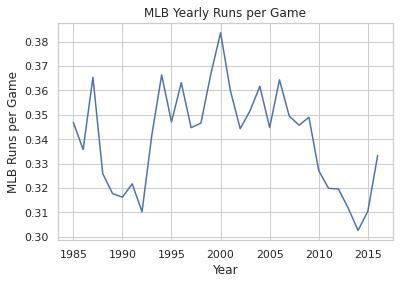

In [14]:
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

In [15]:
def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `df`    
df['year_label'] = df['Season'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# Concatenate `df` and `dummy_df`
df = pd.concat([df, dummy_df], axis=1)

print(df.head())

          Player Name bats  Season League                  Team    G   AB  \
10289   Josh Hamilton    L    2010     AL         Texas Rangers  133  518   
3738   Miguel Cabrera    R    2013     AL        Detroit Tigers  148  555   
14449     DJ LeMahieu    R    2016     NL      Colorado Rockies  146  552   
17792   Daniel Murphy    L    2016     NL  Washington Nationals  142  531   
3723    Melky Cabrera    B    2012     NL  San Francisco Giants  113  459   

         R    H  2B  ...  HR  RBI  SO  IBB  SH  SF   PA     BA year_label  \
10289   95  186  40  ...  32  100  95    5   1   4  576  0.359          8   
3738   103  193  26  ...  44  137  94   19   0   2  671  0.348          8   
14449  104  192  32  ...  11   66  80    2   8   6  637  0.348          8   
17792   88  184  47  ...  25  104  57   10   0   8  592  0.347          8   
3723    84  159  25  ...  11   60  63    4   1   5  505  0.346          8   

       era_8  
10289      1  
3738       1  
14449      1  
17792      1  

In [16]:
df['R_per_game'] = df['R'] / df['G']

Text(0.5, 1.0, 'Runs per Game vs. At Bats')

Text(0, 0.5, 'At Bats')

Text(0.5, 0, 'Runs per Game')

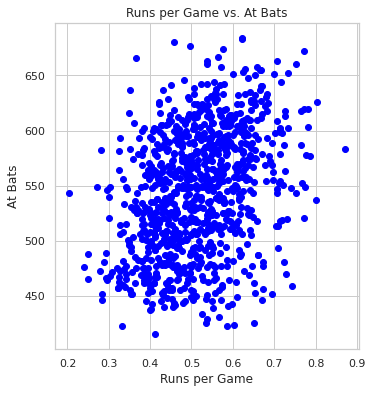

In [20]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df['R_per_game'], df['AB'], c='blue')
ax1.set_title('Runs per Game vs. At Bats')
ax1.set_ylabel('At Bats')
ax1.set_xlabel('Runs per Game')

plt.show()